<h1>1. Import Libraries</h1>

In [1]:
import nltk
import numpy as np
import pandas as pd
from matplotlib import pyplot
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

<h1>2. Data Load</h1>

In [2]:
data_frame= pd.read_csv("D:\\DS\\BBC News Classification\\Data\\BBC News Train.csv")
test_set = pd.read_csv("D:\\DS\\BBC News Classification\\Data\\BBC News Test.csv")

<h3>Viewing top 15 data</h3>


In [3]:
data_frame.head(15)


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


<h3> Viewing unique category </h3>

In [4]:
target_category = data_frame['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


<h3>Total count of respective categories</h3>

In [5]:
data_frame.groupby('Category').count()

,ArticleId,Text
Category,,
business,336,336
entertainment,273,273
politics,274,274
sport,346,346
tech,261,261


<h1> Visualization </h1>
#The ylim() function is of pyplot module of matplotlib library and is used to get or set the y-limits of the current axes.

<AxesSubplot: xlabel='Category'>

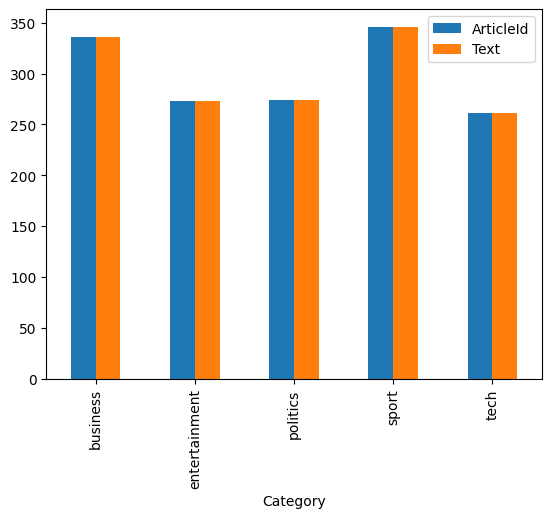

In [6]:
data_frame.groupby('Category').count().plot.bar(ylim=0) 

<h1>Data Preprocessing<h1>

<h1>Tokenization</h1>

In order for a sentence to be understood by a machine, tokenization is performed on the string to break it into individual parts. Thus, tokenization is used to split paragraphs and sentences into smaller units that can be more easily assigned meaning.   

To make it easier to apply tokenization to Pandas dataframe column, and to re-use the function in any other NLP project, we’ll make a little function. This takes a Pandas column name and returns a list of tokens from word_tokenize. The for loop bit uses isalpha() to return values instead of booleans.

In [7]:

def tokenize(Text):
    """-Tokenizes a Pandas dataframe column and returns a list of tokens.
       -Text is argument.
       -And returns tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """
    tokens = nltk.word_tokenize(Text)
    return [w for w in tokens if w.isalpha()] 

Run function on the Pandas text column using a lambda function on the vertical axis (via axis=1). This passes in the whole text column, uses NLTK to tokenize the values, and returns a new Pandas column called tokenized that contains Python lists containing comma separated tokens.

In [8]:
data_frame['tokenized'] = data_frame.apply(lambda x: tokenize(x['Text']), axis=1)
data_frame[['tokenized']].head(15)

,tokenized
0,"[worldcom, launches, defence, lawyers, defendi..."
1,"[german, business, confidence, slides, german,..."
2,"[bbc, poll, indicates, economic, gloom, citize..."
3,"[lifestyle, governs, mobile, choice, faster, b..."
4,"[enron, bosses, in, payout, eighteen, former, ..."
5,"[howard, truanted, to, play, snooker, conserva..."
6,"[wales, silent, on, grand, slam, talk, rhys, w..."
7,"[french, honour, for, director, parker, britis..."
8,"[car, giant, hit, by, mercedes, slump, a, slum..."
9,"[fockers, fuel, festive, film, chart, comedy, ..."


<h1>StopWords</h1>

Stopwords are the common words like 'a', 'in', 'the', 'of'

Checking the list of stopwords

In [9]:

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<h3>Removing the stopwords</h3>

In [10]:
data_frame['without_stopwords'] = data_frame['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [11]:
print(len(data_frame['without_stopwords'][0]))

1455


In [12]:
print(data_frame['without_stopwords'])

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens maj...
3       lifestyle governs mobile choice faster better ...
4       enron bosses $168m payout eighteen former enro...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hits reuters revenues media group ...
1488    apple ipod family expands market apple expande...
1489    santy worm makes unwelcome visit thousands web...
Name: without_stopwords, Length: 1490, dtype: object


<h1>Text Normalization with Stemming and Lemmatization </h1>

<h1>Stemming</h1>

The process of removing the last few characters of a word, to obtain its shorter form. Usually the shorter form is meaningless. 
It is used to get the base word. 

In [14]:
ps = PorterStemmer() #Algorithm for stemming

Stemmization

In [15]:
data_frame['porter_stemmed'] = data_frame['without_stopwords'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [16]:
print(data_frame['porter_stemmed'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . ho

<h1>Lemmetization</h1>

It is used to get valid words as the actual word is returned. For example, eats and eating are derived from one word i.e., eat, hence, the lemma of these words is eat.


In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
data_frame['lemmatized'] = data_frame['porter_stemmed'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [19]:
print(data_frame['lemmatized'][0])

worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first witness. cynthia cooper worldcom ex-head intern account alert director irregular account practic u telecom giant 2002. warn led collaps firm follow discoveri $11bn (£5.7bn) account fraud. mr ebber plead guilti charg fraud conspiracy. prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estimates. m cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom. mr ebber lawyer said unawar fraud argu auditor alert problems. m cooper also said sharehold meet mr ebber often pas technic question compani financ chief give brief answer himself. prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book . howev 

In [20]:

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ArticleId          1490 non-null   int64 
 1   Text               1490 non-null   object
 2   Category           1490 non-null   object
 3   tokenized          1490 non-null   object
 4   without_stopwords  1490 non-null   object
 5   porter_stemmed     1490 non-null   object
 6   lemmatized         1490 non-null   object
dtypes: int64(1), object(6)
memory usage: 81.6+ KB


In [21]:
x = data_frame["Text"]
x.head(15)

0     worldcom ex-boss launches defence lawyers defe...
1     german business confidence slides german busin...
2     bbc poll indicates economic gloom citizens in ...
3     lifestyle  governs mobile choice  faster  bett...
4     enron bosses in $168m payout eighteen former e...
5     howard  truanted to play snooker  conservative...
6     wales silent on grand slam talk rhys williams ...
7     french honour for director parker british film...
8     car giant hit by mercedes slump a slump in pro...
9     fockers fuel festive film chart comedy meet th...
10    blair rejects iraq advice calls tony blair has...
11    housewives lift channel 4 ratings the debut of...
12    uk coal plunges into deeper loss shares in uk ...
13    bp surges ahead on high oil price oil giant bp...
14    ireland 21-19 argentina an injury-time dropped...
Name: Text, dtype: object

In [22]:
y = data_frame.Category
y.head(15)

0          business
1          business
2          business
3              tech
4          business
5          politics
6             sport
7     entertainment
8          business
9     entertainment
10         politics
11    entertainment
12         business
13         business
14            sport
Name: Category, dtype: object

<h1>Splitting train set</h1>

In [23]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, train_size=0.8, random_state=100, shuffle= True, stratify=y)

<h1> Vectorization with Tf-Idf </h1>

In [24]:
# create the transform
vectorizer = TfidfVectorizer()

# tokenize and build vocab
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)
X_transformed = vectorizer.transform(X_train)
X_transformed.toarray()
print(X_transformed)

#for test data

X_test_transformed = vectorizer.transform(X_test)
print(X_test_transformed.toarray())

# print(vectorizer.idf_)

{'blinx': 3155, 'sequel': 18213, 'purrs': 16207, 'nicely': 14021, 'the': 20340, 'original': 14533, 'was': 21894, 'intended': 10975, 'to': 20546, 'convert': 5308, 'many': 12791, 'platform': 15420, 'game': 8959, 'lovers': 12488, 'microsoft': 13272, 'then': 20356, 'new': 13986, 'xbox': 22400, 'console': 5161, 'its': 11233, 'sharp': 18357, 'graphics': 9419, 'and': 1821, 'novel': 14191, 'gameplay': 8964, 'with': 22225, 'main': 12664, 'character': 4266, 'able': 1114, 'pause': 14984, 'slow': 18766, 'rewind': 17284, 'fast': 8132, 'forward': 8684, 'time': 20501, 'were': 22034, 'meant': 13072, 'lure': 12545, 'fans': 8097, 'machine': 12588, 'but': 3763, 'poor': 15568, 'design': 6275, 'became': 2794, 'very': 21603, 'frustrating': 8845, 'affair': 1430, 'players': 15435, 'often': 14366, 'stranded': 19495, 'half': 9648, 'way': 21936, 'through': 20443, 'level': 12158, 'without': 22235, 'required': 17068, 'tools': 20599, 'finish': 8375, 'thankfully': 20331, 'has': 9808, 'fixed': 8439, 'of': 14325, 'fau

<h1> Multinomial Naive Bayes </h1>

In [26]:
NB_model=MultinomialNB()
NB_model.fit(X_transformed, Y_train)


MultinomialNB()

In [27]:
#predict class
y_predict = NB_model.predict(X_test_transformed)
#predict probabilities
y_pred_probability= NB_model.predict_proba(X_test_transformed)


In [28]:
y_predict

array(['sport', 'business', 'tech', 'business', 'politics',
       'entertainment', 'politics', 'politics', 'tech', 'entertainment',
       'business', 'tech', 'sport', 'entertainment', 'entertainment',
       'tech', 'politics', 'entertainment', 'sport', 'entertainment',
       'tech', 'business', 'politics', 'tech', 'tech', 'business', 'tech',
       'politics', 'entertainment', 'politics', 'entertainment', 'sport',
       'sport', 'sport', 'business', 'sport', 'sport', 'politics', 'tech',
       'tech', 'business', 'business', 'tech', 'entertainment',
       'business', 'sport', 'business', 'sport', 'entertainment', 'tech',
       'tech', 'tech', 'politics', 'sport', 'politics', 'sport',
       'entertainment', 'politics', 'entertainment', 'entertainment',
       'politics', 'entertainment', 'tech', 'entertainment', 'sport',
       'business', 'business', 'sport', 'entertainment', 'entertainment',
       'sport', 'tech', 'entertainment', 'sport', 'business',
       'entertainment', 

In [29]:
y_pred_probability

array([[0.0263381 , 0.02196519, 0.01678933, 0.9209953 , 0.01391208],
       [0.59192302, 0.03945513, 0.09559196, 0.14290502, 0.13012487],
       [0.04240147, 0.04992609, 0.0391952 , 0.07588961, 0.79258763],
       ...,
       [0.00253317, 0.00245828, 0.00585173, 0.98580046, 0.00335636],
       [0.17820339, 0.082451  , 0.38892732, 0.27037592, 0.08004238],
       [0.04129249, 0.01425613, 0.05037173, 0.03717611, 0.85690354]])

In [30]:
#printing the overall accuracy

metrics.accuracy_score(Y_test, y_predict)

0.9530201342281879

In [31]:
#confusion matrix

metrics.confusion_matrix(Y_test, y_predict)

array([[65,  0,  1,  1,  0],
       [ 0, 48,  1,  4,  2],
       [ 2,  0, 53,  0,  0],
       [ 0,  0,  0, 69,  0],
       [ 2,  1,  0,  0, 49]], dtype=int64)

<h1> Classification </h1>

In [32]:
print(classification_report(Y_test, y_predict))

               precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       0.98      0.87      0.92        55
     politics       0.96      0.96      0.96        55
        sport       0.93      1.00      0.97        69
         tech       0.96      0.94      0.95        52

     accuracy                           0.95       298
    macro avg       0.96      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298



<h1> Logistic Regression </h1>

In [33]:
Logis_reg = LogisticRegression()
Logis_reg.fit(X_transformed, Y_train)

LogisticRegression()

In [34]:
y_predicted = Logis_reg.predict(X_test_transformed)
y_predicted

array(['sport', 'business', 'tech', 'business', 'politics',
       'entertainment', 'politics', 'politics', 'tech', 'entertainment',
       'business', 'tech', 'sport', 'entertainment', 'entertainment',
       'tech', 'politics', 'entertainment', 'sport', 'entertainment',
       'tech', 'politics', 'politics', 'tech', 'tech', 'business', 'tech',
       'politics', 'entertainment', 'politics', 'entertainment', 'sport',
       'sport', 'sport', 'business', 'sport', 'sport', 'politics', 'tech',
       'tech', 'business', 'business', 'tech', 'entertainment',
       'business', 'sport', 'business', 'sport', 'entertainment', 'tech',
       'tech', 'tech', 'politics', 'sport', 'politics', 'sport',
       'entertainment', 'politics', 'entertainment', 'entertainment',
       'politics', 'entertainment', 'tech', 'entertainment', 'sport',
       'business', 'business', 'sport', 'entertainment', 'entertainment',
       'entertainment', 'tech', 'entertainment', 'sport', 'business',
       'entertai

In [35]:
y_pred_probability = Logis_reg.predict_proba(X_test_transformed)
y_pred_probability

array([[0.07521106, 0.08092992, 0.03738487, 0.76599339, 0.04048077],
       [0.5110157 , 0.08746752, 0.08098436, 0.14657337, 0.17395905],
       [0.07536536, 0.12044154, 0.07873925, 0.09856993, 0.62688393],
       ...,
       [0.02160433, 0.03170167, 0.03646836, 0.87043457, 0.03979106],
       [0.21417957, 0.14349757, 0.30237145, 0.22937808, 0.11057333],
       [0.05150373, 0.03704693, 0.06786871, 0.03654418, 0.80703646]])

In [36]:
metrics.accuracy_score(Y_test, y_predict)

0.9530201342281879

In [37]:
metrics.confusion_matrix(Y_test, y_predict)

array([[65,  0,  1,  1,  0],
       [ 0, 48,  1,  4,  2],
       [ 2,  0, 53,  0,  0],
       [ 0,  0,  0, 69,  0],
       [ 2,  1,  0,  0, 49]], dtype=int64)

<h1> Classification </h1>

In [38]:
print(classification_report(Y_test, y_predict))

               precision    recall  f1-score   support

     business       0.94      0.97      0.96        67
entertainment       0.98      0.87      0.92        55
     politics       0.96      0.96      0.96        55
        sport       0.93      1.00      0.97        69
         tech       0.96      0.94      0.95        52

     accuracy                           0.95       298
    macro avg       0.96      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298



Note: The classification result from both model i.e. Multinomial Naive Bayes and Logistic Regression is similar. 

<h1>Prediction</h3>

In [39]:
new_documents = ['housewives lift channel 4 ratings the debut of us television hit desperate housewives has helped lift channel 4 s january audience share ']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['entertainment']


In [40]:
new_documents = ['howard  truanted to play snooker  conservative leader michael howard has admitted he used to play truant to spend time with his school friends at a snooker hall.']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['politics']


In [41]:
new_documents = ['figures confounded hopes of a 0.2% expansion in the fourth quarter']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['business']


In [42]:
new_documents = ['santy worm makes unwelcome visit thousands of website bulletin boards have been defaced by a virus that used google to spread across the net.  the santy worm first appeared on 20 december and within 24 hours had successfully hit more than 40 000 websites. the malicious program exploits a vulnerability in the widely used phpbb software. ']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['tech']


In [43]:
new_documents = ['wales silent on grand slam talk rhys']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['sport']


In [44]:
new_documents = ['countered criticism at the timing of the announcement  coming less than 24 hours before tottenham s premiership fixture with charlton.  when it comes down to personal problems  i don t think we should talk about timing   he said. ']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['sport']


In [45]:
new_documents = ['bulgaria  23 jelena jankovic (serbia and montenegro)  24 mary pierce (france)  25 lisa raymond (us)  26 daniela hantuchova (slovakia)  27 anna smashnova (israel)  28 shinobu asagoe (japan)  29 gisela dulko (argentina)  30 flavia pennetta (italy)  31 jelena kostanic (croatia)  32 iveta benesova (czech republic)']
new_features = vectorizer.transform(new_documents)
predictions = NB_model.predict(new_features)

print(predictions)

['sport']


<h1> Saving and Loading </h1>

In [46]:
#pickle model allows you to serialize python object into file
import pickle

In [47]:
with open('model_pickle', 'wb') as f:
    pickle.dump(Logis_reg,f)

In [48]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [49]:
import joblib

In [50]:
joblib.dump(NB_model, 'model_jblib')

['model_jblib']

In [51]:
mj = joblib.load('model_jblib')